Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


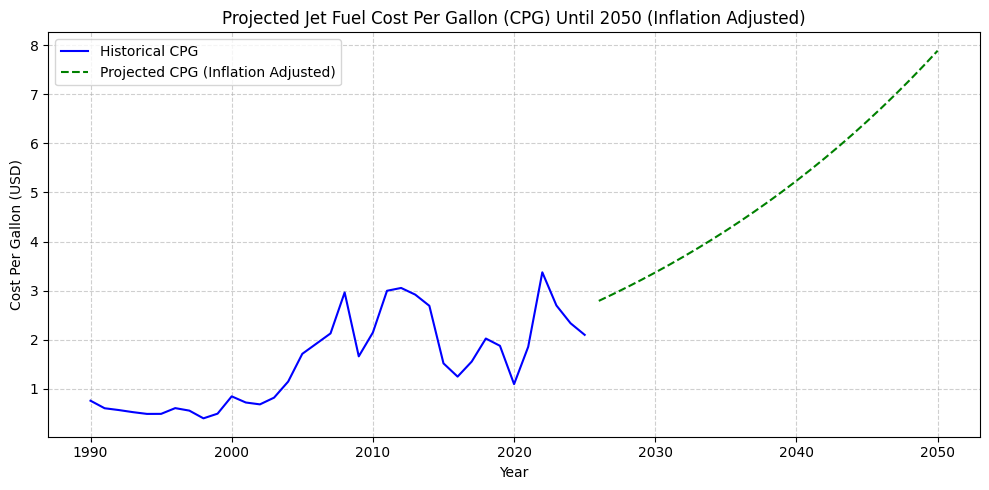

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

drive.mount('/content/drive/')

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Jet_fuel_price_data.csv')  # Ensure the file is in your working directory

# 2. Convert Date column to datetime and extract Year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# 3. Aggregate to yearly average price
df_yearly = df.groupby('Year')['Spot_Price'].mean().reset_index()

# 4. Prepare data for regression
X = df_yearly['Year'].values.reshape(-1, 1)
y = df_yearly['Spot_Price'].values

# 5. Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# 6. Project CPG until 2050
future_years = np.arange(df_yearly['Year'].max() + 1, 2051).reshape(-1, 1)
predicted_cpg = model.predict(future_years)

# 7. Adjust projections for inflation (2.5% annual rate)
inflation_rate = 0.025
years_ahead = future_years.flatten() - df_yearly['Year'].max()
inflation_adjusted_cpg = predicted_cpg * ((1 + inflation_rate) ** years_ahead)

# 8. Plot the results
plt.figure(figsize=(10, 5))

# Historical prices (blue solid line)
plt.plot(df_yearly['Year'], df_yearly['Spot_Price'], linestyle='-', color='blue', label='Historical CPG')

# Projected prices (green dashed line, inflation adjusted)
plt.plot(future_years, inflation_adjusted_cpg, linestyle='--', color='green', label='Projected CPG (Inflation Adjusted)')

# Plot formatting
plt.xlabel("Year")
plt.ylabel("Cost Per Gallon (USD)")
plt.title("Projected Jet Fuel Cost Per Gallon (CPG) Until 2050 (Inflation Adjusted)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()